In [61]:
import pylheV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [64]:
particlesDict = {}

In [65]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [66]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [116]:
hist = []
#Reading the file
for e in pylheV.readLHE('ChargeMultiplicity.lhe'):
    count = 0
    for i in range(int(getattr(e.eventinfo,'nparticles'))):
        #Getting the attributes
        particle_id = abs(getattr(e.particles[i],'id'))
        particle_status = getattr(e.particles[i],'status')
        
        #Verifying if the particle is final and charged
        if (particle_status > 0) and (particlesDict[particle_id]['chargeType'] != 0):
            count = count+1
    hist.append(count)
    
            
    

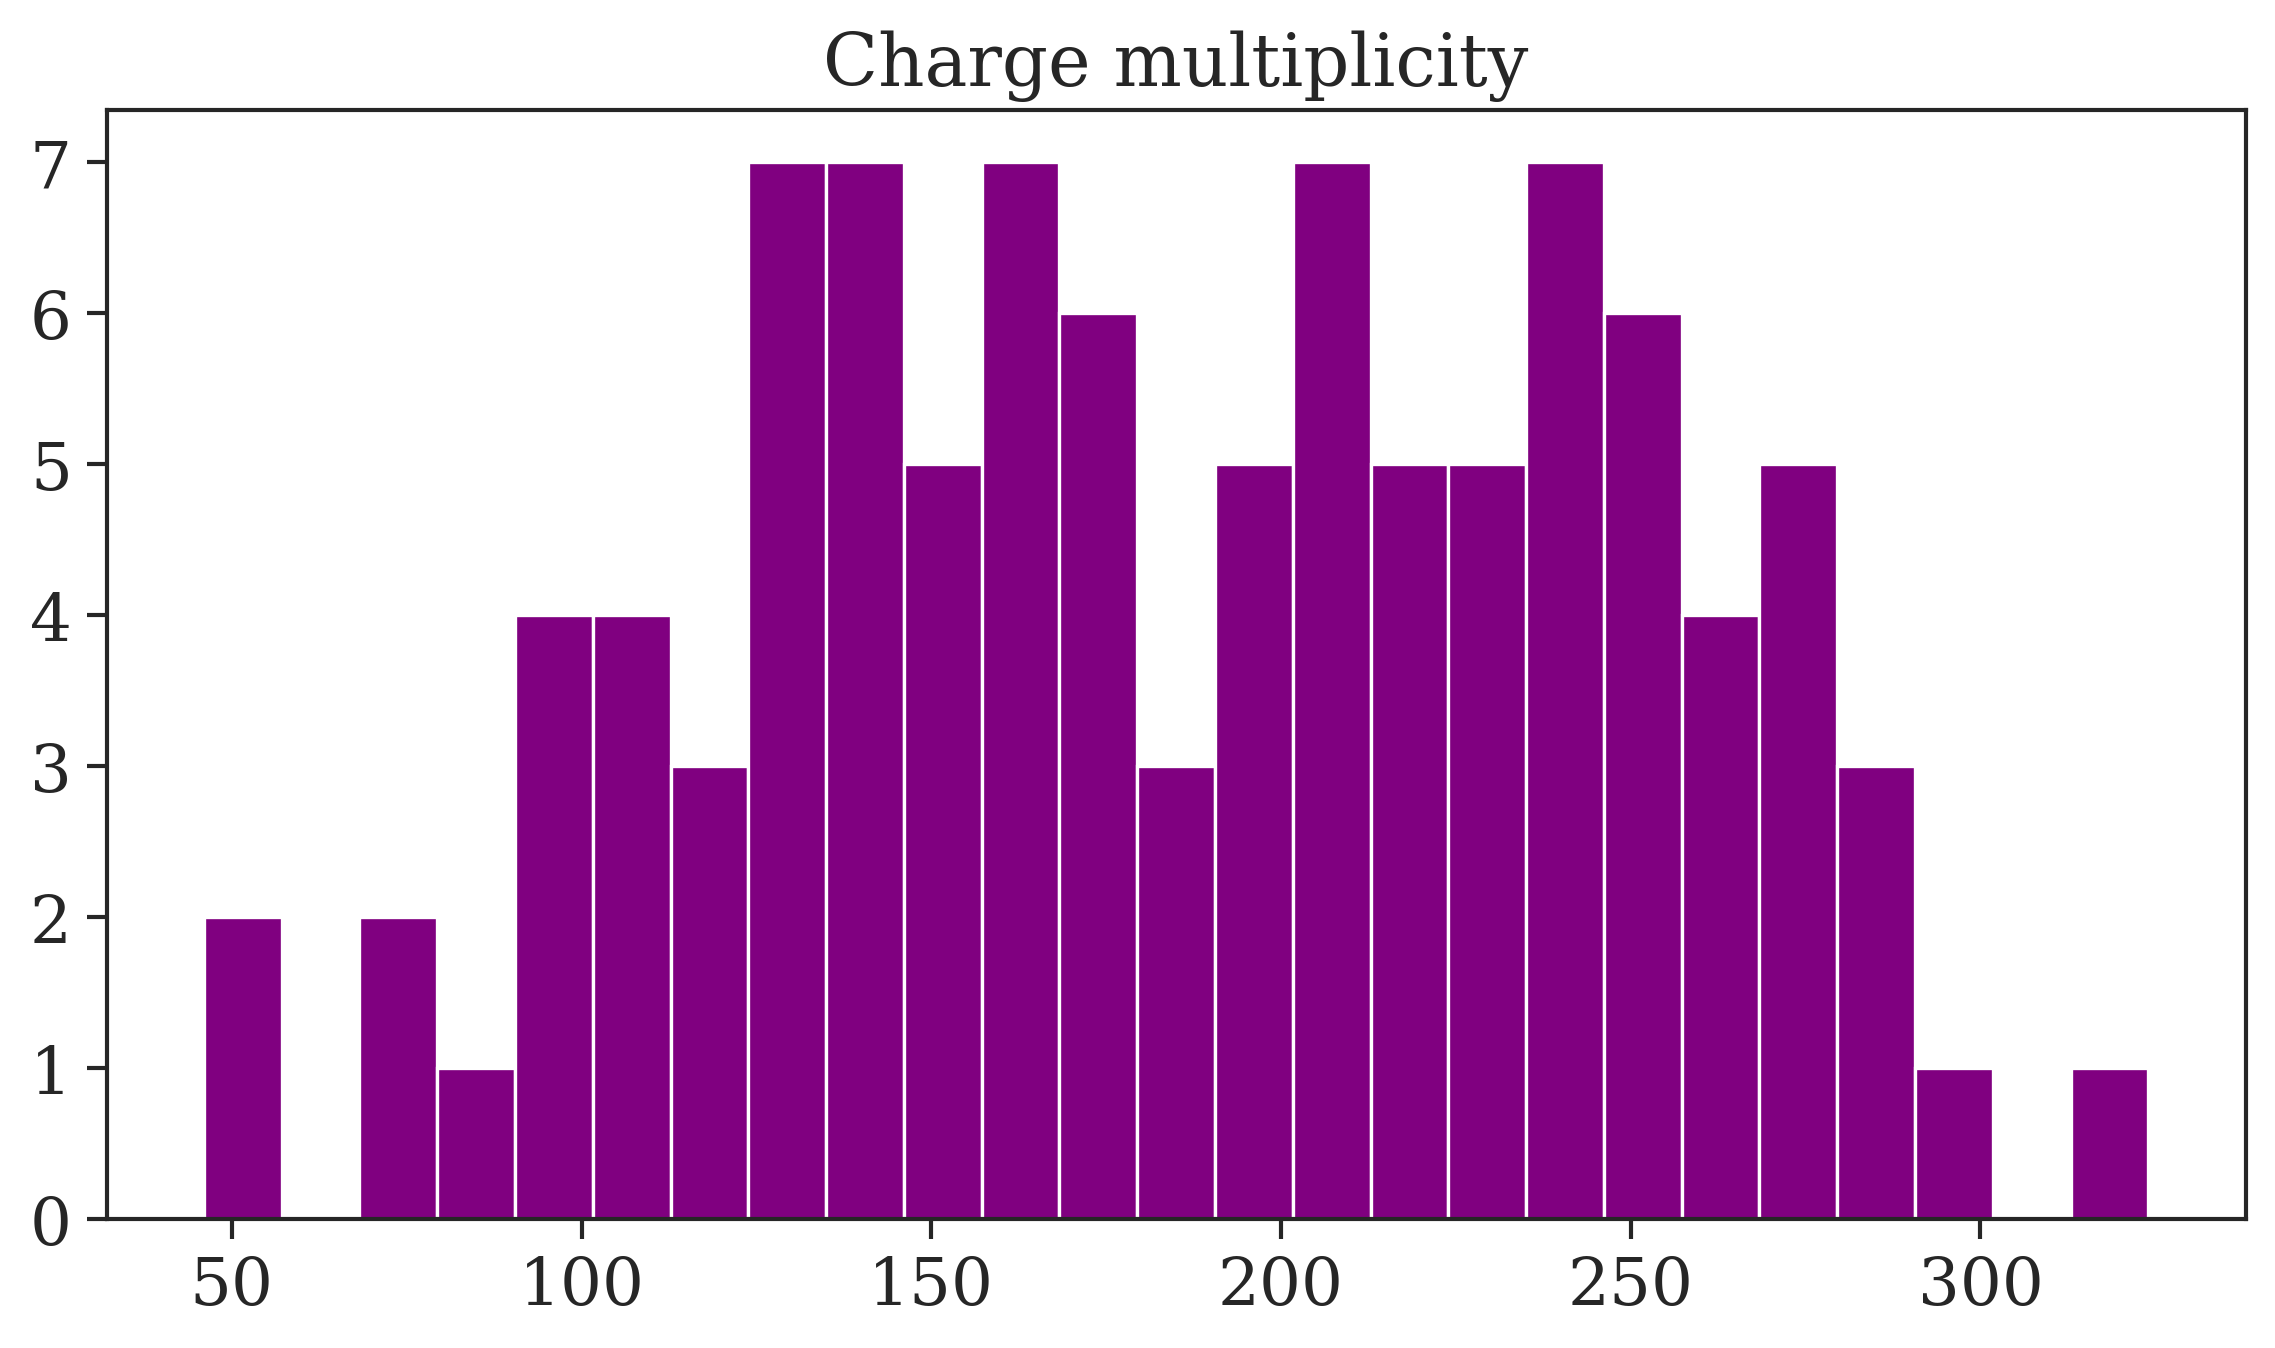

In [129]:
#Ploting the charge multiplicity
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(hist, bins = 25, color = 'purple')

plt.title(r'Charge multiplicity')
plt.show()

In [119]:
hist1 = []
#Reading the file
for e in pylheV.readLHE('pp_2_ttbar.lhe'):
    count = 0
    for i in range(int(getattr(e.eventinfo,'nparticles'))):
        #Getting the attributes
        particle_id = abs(getattr(e.particles[i],'id'))
        particle_status = getattr(e.particles[i],'status')
        
        #Verifying if the particle is final and charged
        if (particle_status > 0) and (particlesDict[particle_id]['chargeType'] != 0):
            count = count+1
    hist1.append(count)
    
            
    

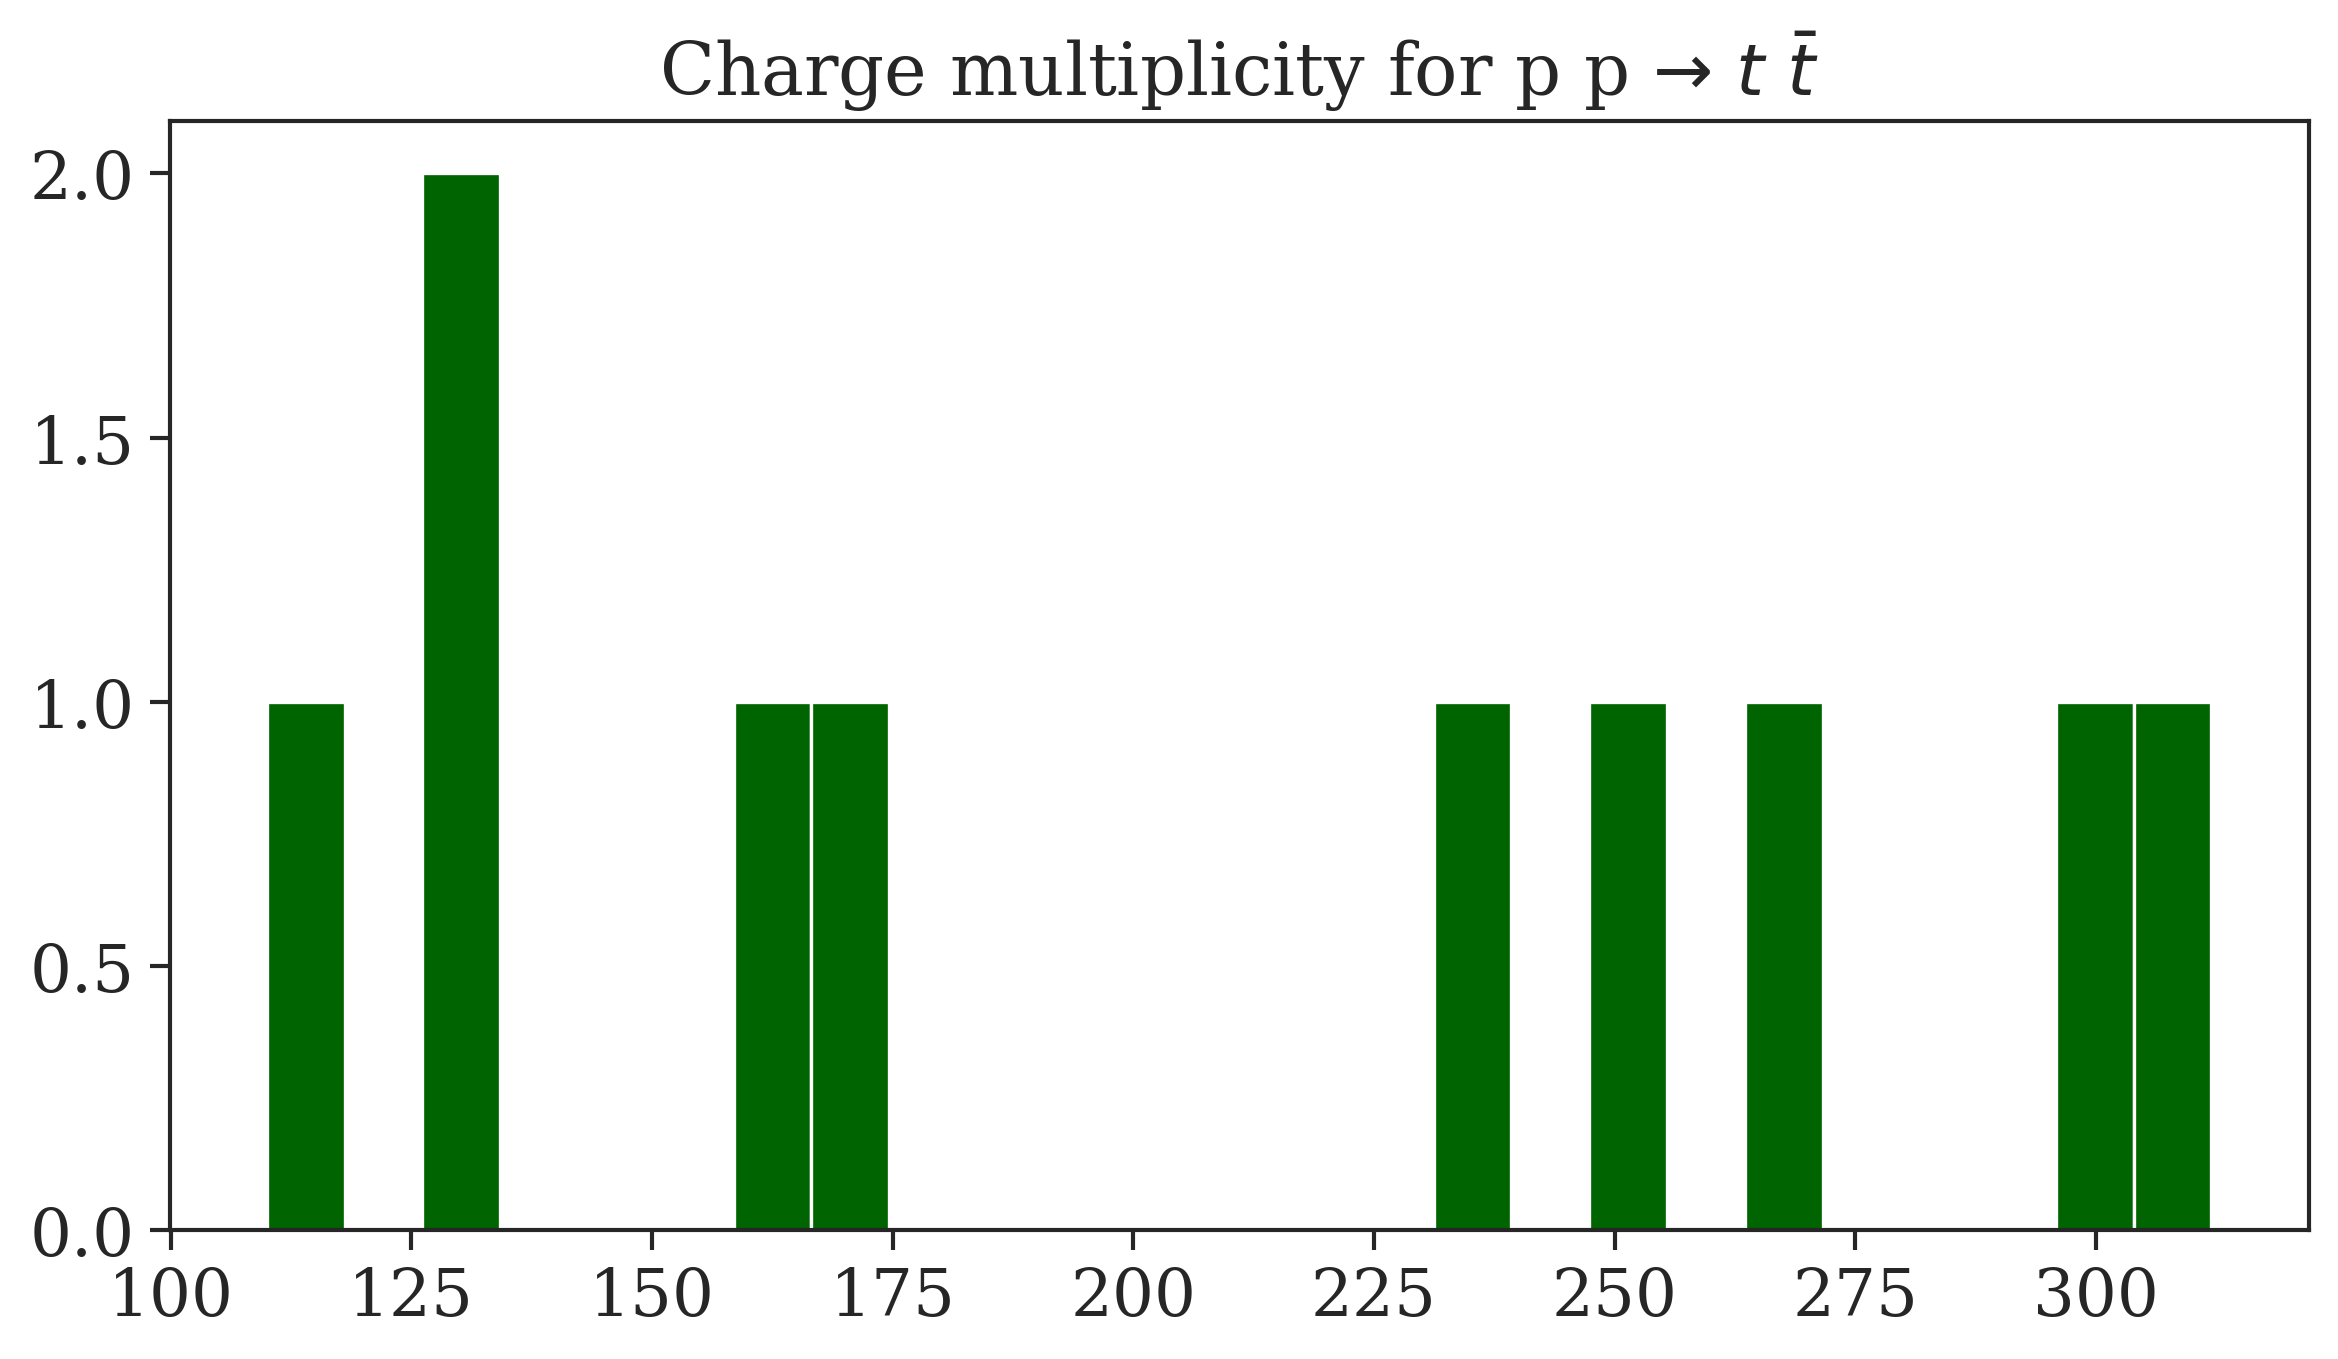

In [130]:
#Ploting the charge multiplicity
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(hist1, bins = 25, color = 'darkgreen')

plt.title(r'Charge multiplicity for p p $\to$ $t$ $\bar{t}$')
plt.show()